## Histograms & Counts
2024-08-22

Histograms and counts of ESG data

In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn
import investpy


SPX Analysis



  0%|          | 0/505 [00:00<?, ?it/s]



ESG scores for equities distribution on 2022-03-16:


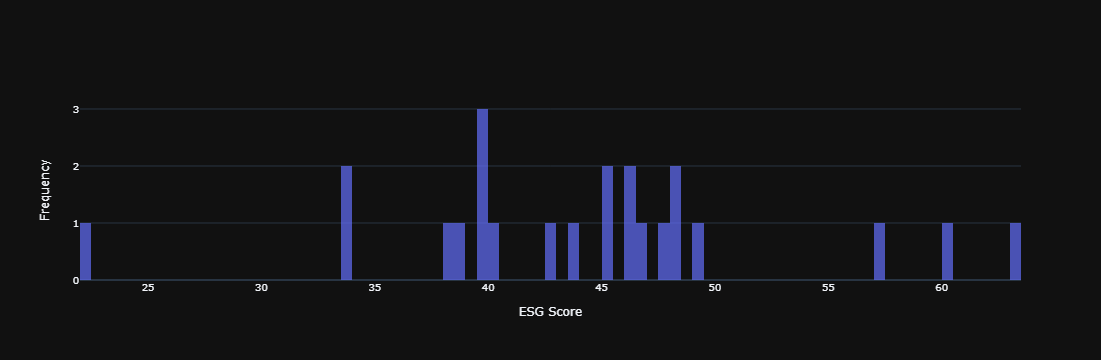

Total count: 23
Zero count: 0
Standard deviation: 8.62
Max score: 63.09
Median: 45.15
Mean (Excluding 0): 44.26
Q1: 39.78
Q3: 48.1
IQR: 8.32

Companies with Top 5 ESG Scores:
American Water Works US0304201033
Eversource Energy US30040W1080
NiSource Inc US65473P1057
Alliant Energy Corp US0188021085
PPL Corporation US69351T1060

Companies with Bottom 5 ESG Scores:
Evergy Inc US30034W1062
Edison International US2810201077
Duke Energy Corporation US26441C2044
FirstEnergy Corporation US3379321074
Sempra Energy US8168511090

EURO Analysis



  0%|          | 0/600 [00:00<?, ?it/s]



ESG scores for equities distribution on 2022-03-16:


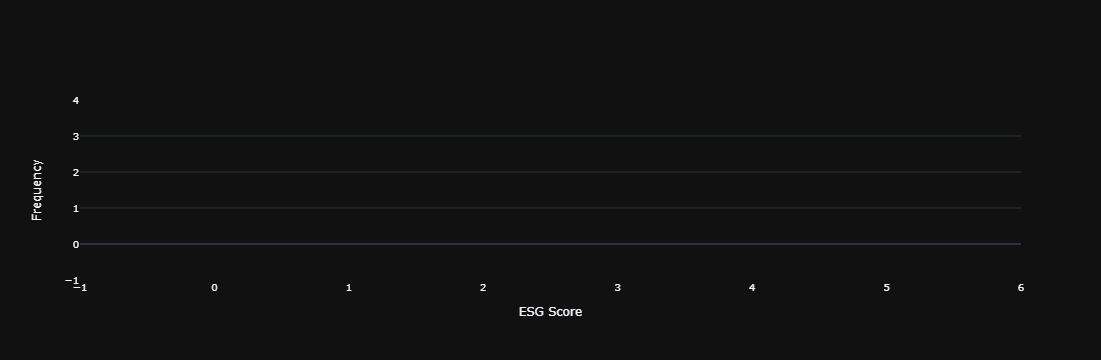

Total count: 0
Zero count: 0
Standard deviation: nan


C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:265: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:223: RuntimeWarning:

invalid value encountered in divide

C:\Users\anish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:257: RuntimeWarning:

invalid value encountered in double_scalars



ValueError: max() arg is an empty sequence

In [31]:
# check if there are any isins for which there is no data for a given date
date = '2022-03-16'
date2 = date.replace('-', '/')
for const, sector, esg, market in [(spx_const, spx_sector, spx_esg, 'SPX'), (euro_const, euro_sector, euro_esg, 'EURO')]:
    print(f'\n{market} Analysis\n')
    scores = []
    dates = []
    companies = []
    na = set()
    for isin in tqdm(const[date]):
        try:
            if sector.get(isin) != 'utilities':
                continue
            scores.append([esg[isin][pd.to_datetime(date2)]['esg_score'], isin])
            companies.append(isin)
        except Exception:
            na.add(isin)
    scores.sort()
    
    
    plt.style.use('dark_background') # plot distribution of ESG scores for given date
    
    print(f"\n\nESG scores for equities distribution on {date}:")
    values = []
    for x in scores:
        if x[0] != 0:
            values.append(x[0])
    
    fig = go.Figure(data=[go.Histogram(x=values, nbinsx=90, opacity=0.7)])
    
    fig.update_layout(
        xaxis_title_text='ESG Score', 
        yaxis_title_text='Frequency',  
        template='plotly_dark',
        font=dict(size=10)            
    )
    
    fig.show()
    
    
    # descriptive statistics for distribution
    arr = np.array([x[0] for x in scores])
    print(f"Total count: {len(scores)}")
    print(f"Zero count: {len(arr[arr == 0])}")
    print(f"Standard deviation: {round(np.std(arr), 2)}")
    print(f"Max score: {round(max(arr), 2)}")
    print(f"Median: {round(np.median(arr), 2)}")
    print(f"Mean (Excluding 0): {round(arr[arr != 0].mean(), 2)}")
    print(f"Q1: {round(np.percentile(arr, 25), 2)}")
    print(f"Q3: {round(np.percentile(arr, 75), 2)}")
    print(f"IQR: {round(np.subtract(*np.percentile(arr, [75, 25])), 2)}")
    
    print(f"\nCompanies with Top 5 ESG Scores:")
    # 5 companies with best ESG score
    for rri, isin in scores[:5]:
        try:
            print(investpy.stocks.search_stocks(by='isin', value=isin).full_name[0], isin)
        except Exception:
            print(isin)
    print(f"\nCompanies with Bottom 5 ESG Scores:")
    for rri, isin in scores[-5:]:
        try:
            print(investpy.stocks.search_stocks(by='isin', value=isin).full_name[0], isin)
        except Exception:
            print(isin)

In [34]:
def generate_isin(date, const, sector, mc, financials_util=True, above=True):
    if financials_util == 'financials/util':
        financials_util = True
    if financials_util == 'others':
        financials_util = False
    if above == 'above':
        above = True
    if above == 'below':
        above = False
    isin_values = []
    # find isin values matching bucket
    for isin in const.get(date, []):
        if (str(sector.get(isin, '')).lower() in ['financials', 'utilities']) == financials_util:
            isin_values.append(isin)
    isin_values.sort(key=lambda x: mc.get(x, {}).get(pd.to_datetime(date), {}).get('market_cap', 0))
    # split isin values based on market cap 
    if above:
        return set(isin_values[len(isin_values)//2:])
    return set(isin_values[:len(isin_values)//2])

for const, sector, mc, esg, market in [(spx_const, spx_sector, spx_mc, spx_esg, 'SPX'), (euro_const, euro_sector, euro_mc, euro_esg, 'EURO')]:
    print(f'\n{market} Analysis\n')
    for p1 in ['financials/util', 'others']: 
        for p2 in ['above', 'below']:
            print('\n', p1, p2, '\n')
            isins2 = list(generate_isin('2024-04-03', const, sector, mc, financials_util=p1, above=p2))
            isins = []
            for isin in isins2:
                if len(esg.get(isin, {}).get(pd.to_datetime('2024-04-03'), {})):
                    isins.append(isin)
            isins.sort(key=lambda x: esg[x][pd.to_datetime('2024-04-03')]['esg_score'])
            print('Companies with Top 5 ESG score: ')
            for isin in isins[:5]:
                try:
                    print(investpy.stocks.search_stocks(by='isin', value=isin).full_name[0], esg[isin][pd.to_datetime('2024-04-03')]['esg_score'])
                except Exception:
                    print(isin, esg[isin][pd.to_datetime('2024-04-03')]['esg_score'])
            
            print('\nCompanies with Bottom ESG score: ')
            for isin in isins[-5:]:
                try:
                    print(investpy.stocks.search_stocks(by='isin', value=isin).full_name[0], esg[isin][pd.to_datetime('2024-04-03')]['esg_score'])
                except Exception:
                    print(isin, esg[isin][pd.to_datetime('2024-04-03')]['esg_score'])


SPX Analysis


 financials/util above 

Companies with Top 5 ESG score: 
Realty Income Corp 0.0
Public Storage 0.023849944781594842
Extra Space Storage Inc 0.5063998611666759
Aflac Inc 5.717300297768132
Welltower Inc 7.536363622754101

Companies with Bottom ESG score: 
JPMorgan Chase & Co 82.04449112712454
Alphabet Inc C 82.38751983256081
Alphabet Inc 82.38751983256081
Wells Fargo & Co 82.7013385407628
Goldman Sachs Group Inc 87.16031642977569

 financials/util below 

Companies with Top 5 ESG score: 
Regency Centers Corporation 0.0
US3137451015 0.0
MarketAxess Holdings Inc 0.0
Alexandria Real Estate Equities Inc 0.0
Kimco Realty Corporation 0.03133492874682934

Companies with Bottom ESG score: 
Franklin Resources Inc 48.50093256839289
Invesco Plc 49.00912676702433
United Airlines Holdings Inc 50.77909499587049
Ameren Corp 57.16326273131326
FirstEnergy Corporation 58.441321062471886

 others above 

Companies with Top 5 ESG score: 
Cadence Design Systems Inc 0.0
Synopsys Inc 0.0
Super

In [ ]:
for const, esg, dates, market in [(spx_const, spx_esg, weekly_dates_spx, 'SPX'), (euro_const, euro_esg, weekly_dates_euro, 'EURO')]:
    counts = {'e': [], 's': [], 'g': [], 'es': [], 'eg': [], 'sg': [], 'esg': [], 'z': [], 'na': []}
    
    for date in tqdm(dates):
        e, s, g, es, eg, sg, esg, z, na = 0, 0, 0, 0, 0, 0, 0, 0, 0
        date = date.strftime('%Y-%m-%d')
        for isin in const.get(date , []):
            if esg.get(isin, {}).get(pd.to_datetime(date), -1) == -1:
                na += 1
            elif esg[isin][pd.to_datetime(date)]['environment'] > 0 and esg[isin][pd.to_datetime(date)]['social'] > 0 and esg[isin][pd.to_datetime(date)]['government'] > 0:
                esg += 1
            elif esg[isin][pd.to_datetime(date)]['environment'] > 0 and esg[isin][pd.to_datetime(date)]['social'] > 0:
                es += 1
            elif esg[isin][pd.to_datetime(date)]['environment'] > 0 and esg[isin][pd.to_datetime(date)]['government'] > 0:
                eg += 1
            elif esg[isin][pd.to_datetime(date)]['government'] > 0 and esg[isin][pd.to_datetime(date)]['social'] > 0:
                sg += 1
            elif esg[isin][pd.to_datetime(date)]['government'] > 0:
                g += 1
            elif esg[isin][pd.to_datetime(date)]['social'] > 0:
                s += 1
            elif esg[isin][pd.to_datetime(date)]['environment'] > 0:
                e += 1
            else:
                z += 1
        counts['e'].append(e)
        counts['s'].append(s)
        counts['g'].append(g)
        counts['es'].append(es)
        counts['eg'].append(eg)
        counts['sg'].append(sg)
        counts['esg'].append(esg)
        counts['z'].append(z)
        counts['na'].append(na)
    
    counts = pd.DataFrame(counts)
    
    fig = px.bar(counts[['e', 's', 'g', 'es', 'sg', 'eg', 'esg', 'z', 'na']], title=f'{market} Counts')
    
    fig.update_layout(
        template='plotly_dark',
        title_font=dict(size=24, color='white'),
        xaxis=dict(
            title='Category',
            titlefont=dict(size=18, color='white'),
            tickfont=dict(size=14, color='white')
        ),
        yaxis=dict(
            title='Values',
            titlefont=dict(size=18, color='white'),
            tickfont=dict(size=14, color='white')
        )
    )
    fig.show()
    fig.write_html(f"{market}_counts.html")

In [ ]:
# Counts of each group/sector in the S&P / EURO for a given date
count = {
        'spx_financials/utilities_above_meet_esg': [],
        'spx_financials/utilities_above_not_esg': [],
        'spx_financials/utilities_below_meet_esg': [],
        'spx_financials/utilities_below_not_esg': [],
        'spx_other_above_meet_esg': [],
        'spx_other_above_not_esg': [],
        'spx_other_below_meet_esg': [],
        'spx_other_below_not_esg': [],
        'euro_financials/utilities_above_meet_esg': [],
        'euro_financials/utilities_above_not_esg': [],
        'euro_financials/utilities_below_meet_esg': [],
        'euro_financials/utilities_below_not_esg': [],
        'euro_other_above_meet_esg': [],
        'euro_other_above_not_esg': [],
        'euro_other_below_meet_esg': [],
        'euro_other_below_not_esg': [],
        }

# all isins in S&P500 for given date
def generate_isin_euro(date, financials=True, above=True):
    isin_values = set()
    for isin in euro_const.get(date, []):
        if euro_sector.get(isin, '') in ['Financials', 'Utilities']:
            if financials:
                isin_values.add(isin)
        else:
            if not financials:
                isin_values.add(isin)
    mc = [0]
    for isin in isin_values:
        if euro_mc.get(isin, {}).get(pd.to_datetime(date), {}).get('market_cap', 0) > 0:
            mc.append(euro_mc[isin][pd.to_datetime(date)]['market_cap'])
    mc.sort()
    threshold = mc[len(mc)//2]
    good_isin = set()
    for isin in isin_values:
        if above:
            if euro_mc.get(isin, {}).get(pd.to_datetime(date), {}).get('market_cap', 0) > threshold:
                good_isin.add(isin)
        else:
            if euro_mc.get(isin, {}).get(pd.to_datetime(date), {}).get('market_cap', 0) <= threshold:
                good_isin.add(isin)
    return good_isin

def generate_isin_spx(date, financials=True, above=True):
    isin_values = set()
    for isin in spx_const.get(date, []):
        if spx_sector.get(isin, '') in ['financials', 'utilities']:
            if financials:
                isin_values.add(isin)
        else:
            if not financials:
                isin_values.add(isin)
    mc = [0]
    for isin in isin_values:
        if spx_mc.get(isin, {}).get(pd.to_datetime(date), {}).get('market_cap', 0) > 0:
            mc.append(spx_mc[isin][pd.to_datetime(date)]['market_cap'])
    mc.sort()
    threshold = mc[len(mc)//2]
    good_isin = set()
    for isin in isin_values:
        if above:
            if spx_mc.get(isin, {}).get(pd.to_datetime(date), {}).get('market_cap', 0) > threshold:
                good_isin.add(isin)
        else:
            if spx_mc.get(isin, {}).get(pd.to_datetime(date), {}).get('market_cap', 0) <= threshold:
                good_isin.add(isin)
    return good_isin

dates = []

for i in tqdm(range(len(datelist))):
    # parse current date
    date = datelist[i].strftime('%Y-%m-%d') 
    dates.append(date)
    date2 = pd.to_datetime(date)

    for p1 in [True, False]:
        for p2 in [True, False]:
            isins = generate_isin_euro(date, p1, p2)
            meet_esg = 0
            not_esg = 0
            for isin in isins:
                if not len(euro_esg.get(isin, [])):
                        continue
                if not len(euro_esg[isin].get(date2, [])): # if no data ignore
                    continue
                elif (euro_esg[isin][date2][metric] > THRESHOLD): # if esg metric is greater than threshold add it to non esg portfolios
                    not_esg += 1
                elif (0 < euro_esg[isin][date2][metric] <= THRESHOLD): # if esg metric is greater than threshold add it to non esg portfolios
                    meet_esg += 1
            if p1 and p2:
                count['euro_financials/utilities_above_meet_esg'].append(meet_esg)
                count['euro_financials/utilities_above_not_esg'].append(not_esg)
            if p1 and not p2:
                count['euro_financials/utilities_below_meet_esg'].append(meet_esg)
                count[ 'euro_financials/utilities_below_not_esg'].append(not_esg)
            if not p1 and p2:
                count['euro_other_above_meet_esg'].append(meet_esg)
                count['euro_other_above_not_esg'].append(not_esg)
            if not p1 and not p2:
                count['euro_other_below_meet_esg'].append(meet_esg)
                count['euro_other_below_not_esg'].append(not_esg)
                
    for p1 in [True, False]:
        for p2 in [True, False]:
            isins = generate_isin_spx(date, p1, p2)
            meet_esg = 0
            not_esg = 0
            for isin in isins:
                if not len(spx_esg.get(isin, [])):
                        continue
                if not len(spx_esg[isin].get(date2, [])): # if no data ignore
                    continue
                elif (spx_esg[isin][date2][metric] > THRESHOLD): # if esg metric is greater than threshold add it to non esg portfolios
                    not_esg += 1
                elif (0 < spx_esg[isin][date2][metric] <= THRESHOLD): # if esg metric is greater than threshold add it to non esg portfolios
                    meet_esg += 1
            if p1 and p2:
                count['spx_financials/utilities_above_meet_esg'].append(meet_esg)
                count['spx_financials/utilities_above_not_esg'].append(not_esg)
            if p1 and not p2:
                count['spx_financials/utilities_below_meet_esg'].append(meet_esg)
                count['spx_financials/utilities_below_not_esg'].append(not_esg)
            if not p1 and p2:
                count['spx_other_above_meet_esg'].append(meet_esg)
                count['spx_other_above_not_esg'].append(not_esg)
            if not p1 and not p2:
                count['spx_other_below_meet_esg'].append(meet_esg)
                count['spx_other_below_not_esg'].append(not_esg)

counts = pd.DataFrame(count)
counts['date'] = dates
counts.set_index('date', inplace=True)

counts.to_csv('grouping_counts.csv')

In [ ]:
fig = px.bar(counts[['spx_financials/utilities_above_meet_esg', 'spx_financials/utilities_above_not_esg', 'spx_financials/utilities_below_meet_esg', 'spx_financials/utilities_below_not_esg', 'spx_other_above_meet_esg', 'spx_other_above_not_esg', 'spx_other_below_meet_esg', 'spx_other_below_not_esg']], title='SPX Counts')

fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=24, color='white'),
    xaxis=dict(
        title='Category',
        titlefont=dict(size=18, color='white'),
        tickfont=dict(size=14, color='white')
    ),
    yaxis=dict(
        title='Values',
        titlefont=dict(size=18, color='white'),
        tickfont=dict(size=14, color='white')
    )
)
fig.show()
fig.write_html("spx_counts_groupings.html")

In [ ]:
fig = px.bar(counts[['euro_financials/utilities_above_meet_esg', 'euro_financials/utilities_above_not_esg', 'euro_financials/utilities_below_meet_esg', 'euro_financials/utilities_below_not_esg', 'euro_other_above_meet_esg', 'euro_other_above_not_esg', 'euro_other_below_meet_esg', 'euro_other_below_not_esg']], title='Euro Counts')

fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=24, color='white'),
    xaxis=dict(
        title='Category',
        titlefont=dict(size=18, color='white'),
        tickfont=dict(size=14, color='white')
    ),
    yaxis=dict(
        title='Values',
        titlefont=dict(size=18, color='white'),
        tickfont=dict(size=14, color='white')
    )
)
fig.show()
fig.write_html("euro_counts_groupings.html")